# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "./lab_2_data/train.p"
testing_file = "./lab_2_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
from IPython.display import display, Image
%matplotlib inline

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Class: 0


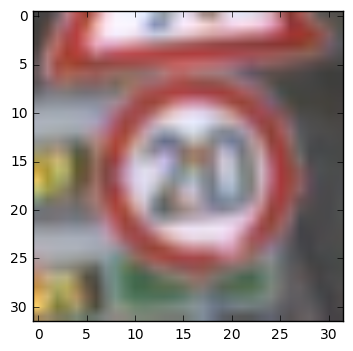

Class: 1


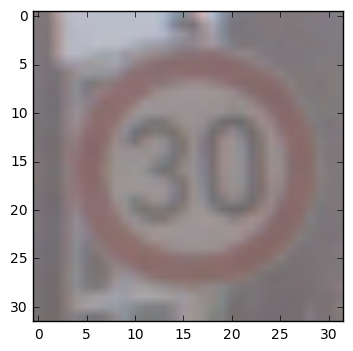

Class: 2


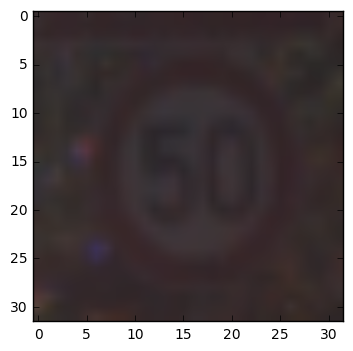

Class: 3


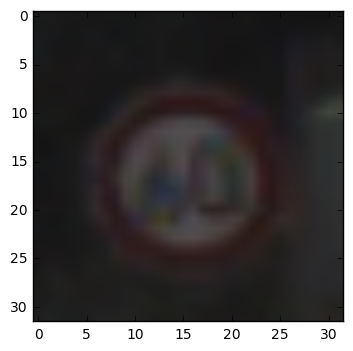

Class: 4


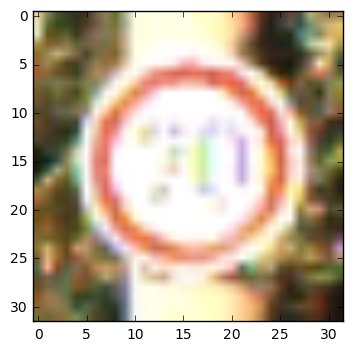

Class: 5


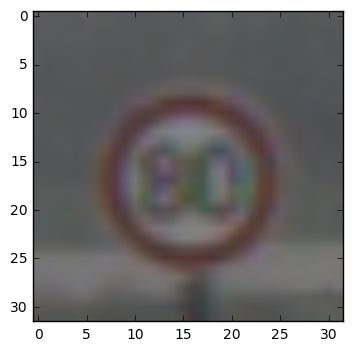

Class: 6


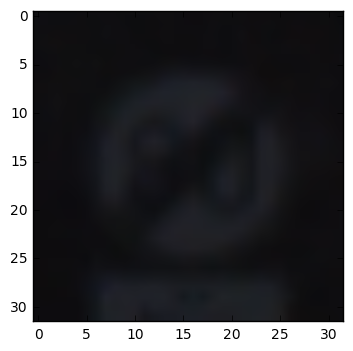

Class: 7


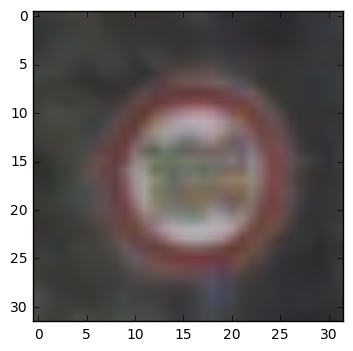

Class: 8


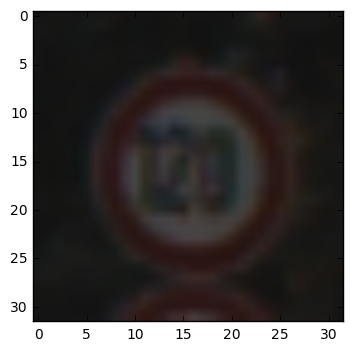

Class: 9


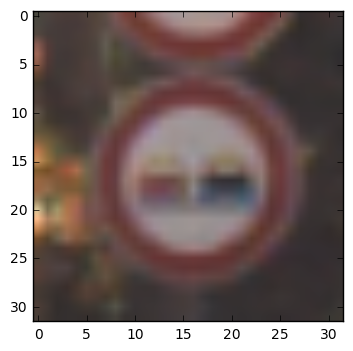

Class: 10


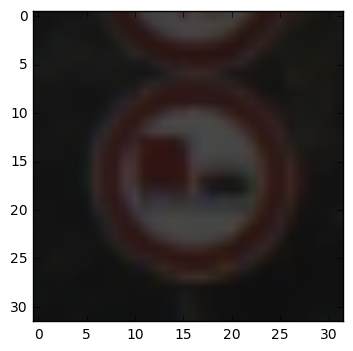

Class: 11


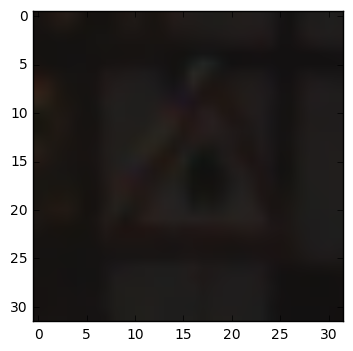

Class: 12


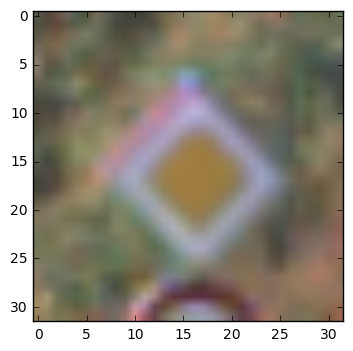

Class: 13


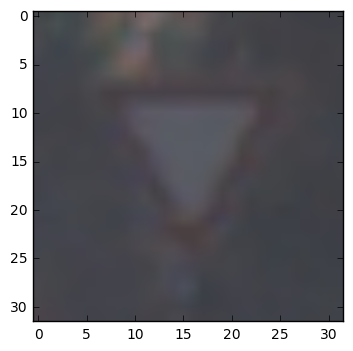

Class: 14


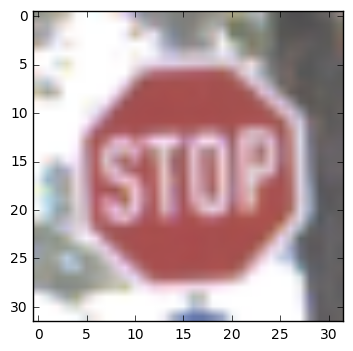

Class: 15


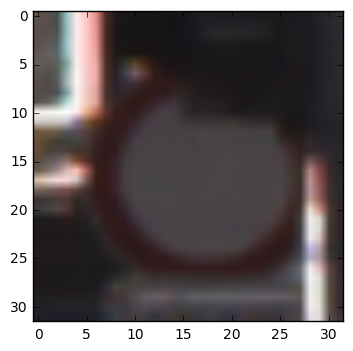

Class: 16


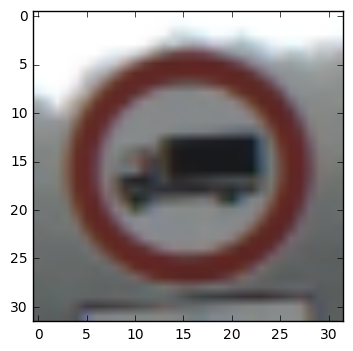

Class: 17


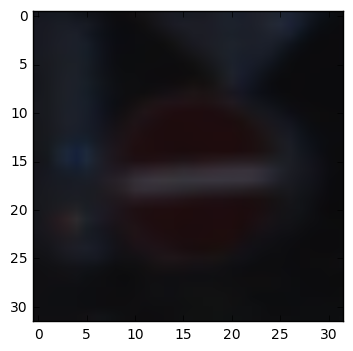

Class: 18


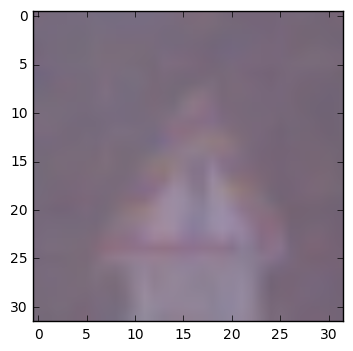

Class: 19


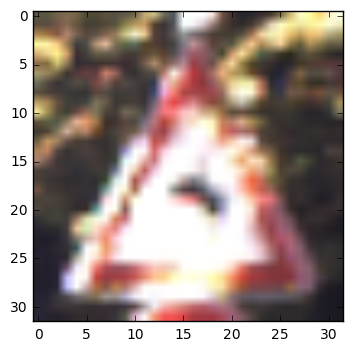

Class: 20


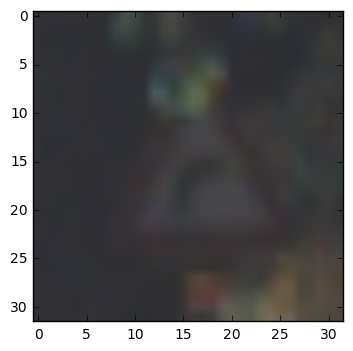

Class: 21


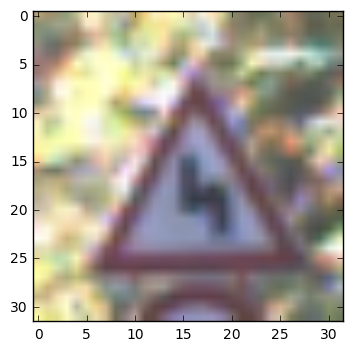

Class: 22


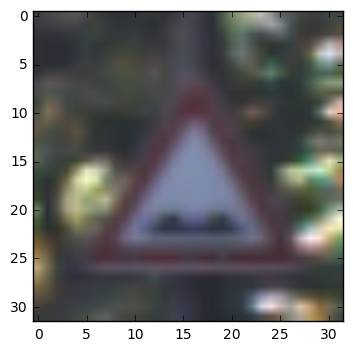

Class: 23


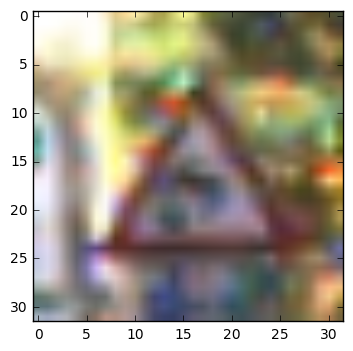

Class: 24


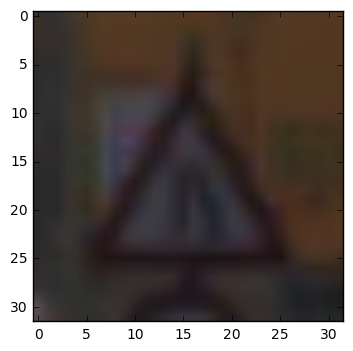

Class: 25


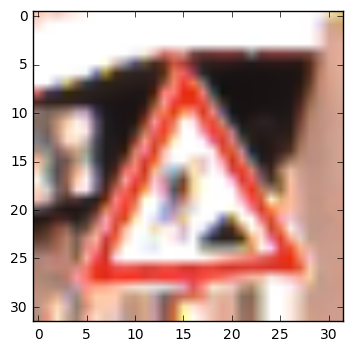

Class: 26


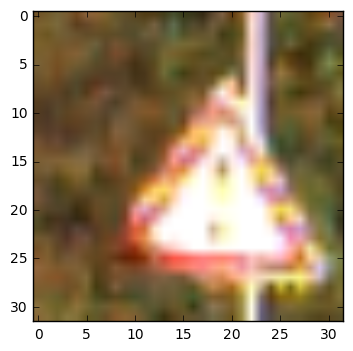

Class: 27


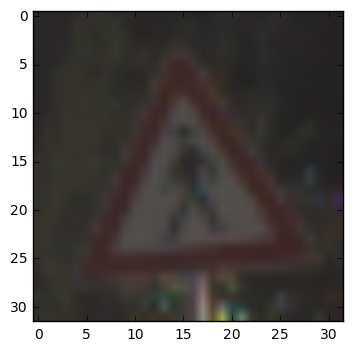

Class: 28


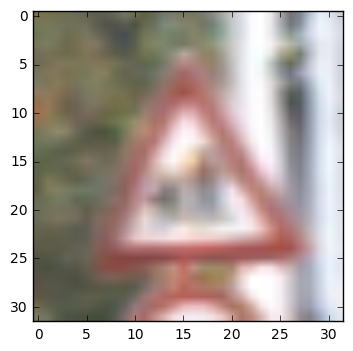

Class: 29


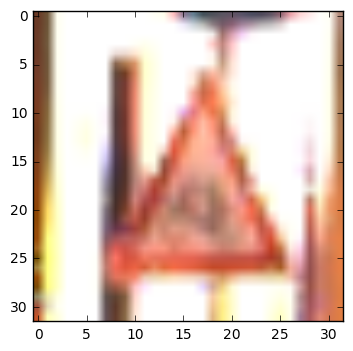

Class: 30


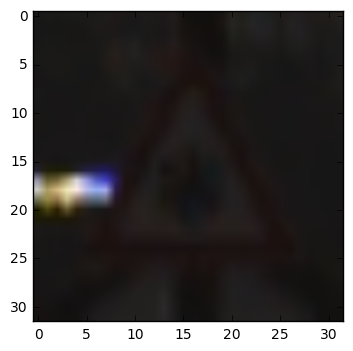

Class: 31


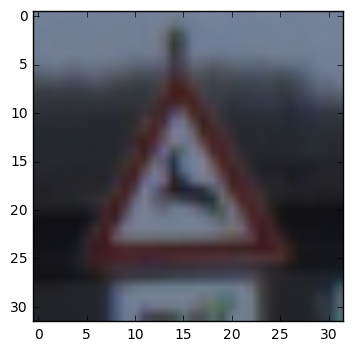

Class: 32


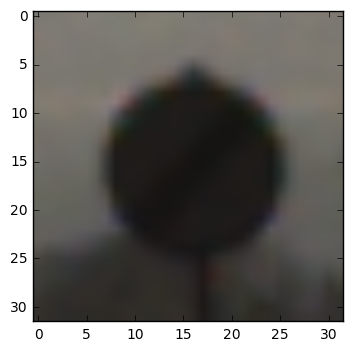

Class: 33


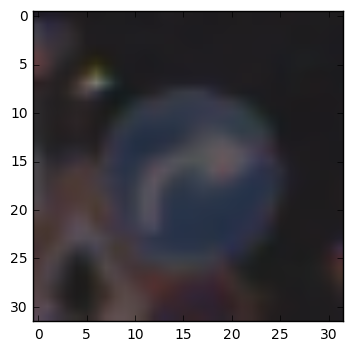

Class: 34


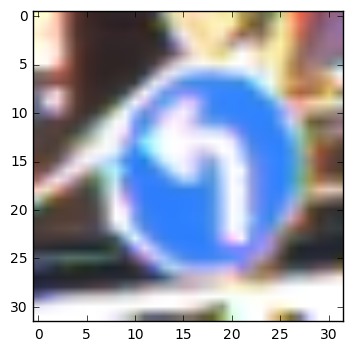

Class: 35


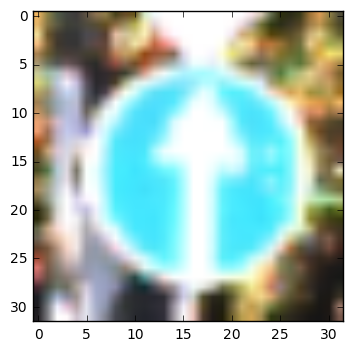

Class: 36


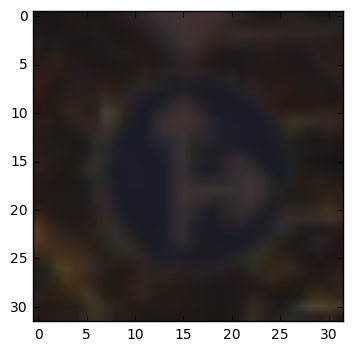

Class: 37


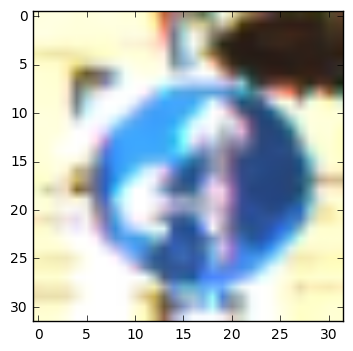

Class: 38


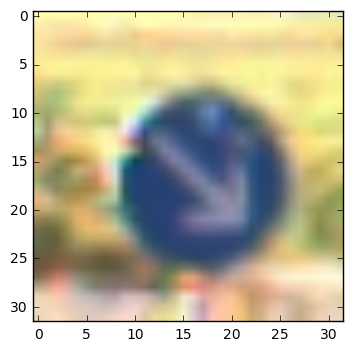

Class: 39


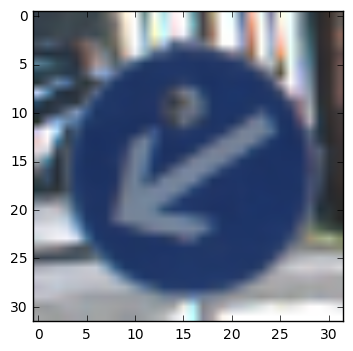

Class: 40


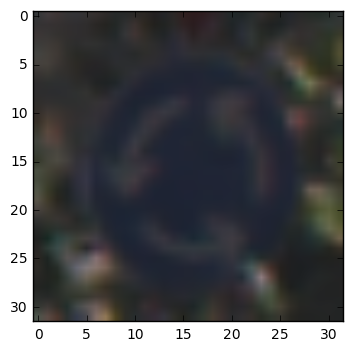

Class: 41


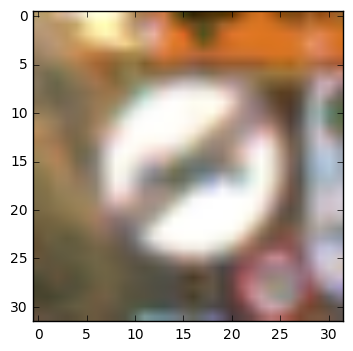

Class: 42


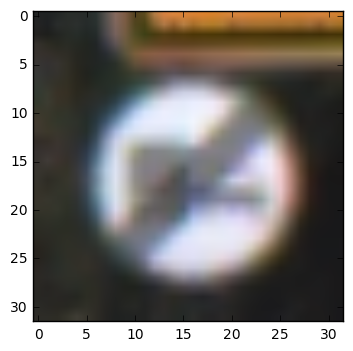

In [3]:
# Print out Signs corresponding to the class number.
for i in range(n_classes):
    print("Class:",i)
    plt.imshow(X_train[np.argwhere(y_train==i)[5][0]])
    plt.show()

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random

### Print out the number of each class from the train set
count_train = []
for i in range(n_classes):
    count = len(y_train[y_train==i])
    print("Number of Class", i, ":", count)
    count_train.append(count)

Number of Class 0 : 210
Number of Class 1 : 2220
Number of Class 2 : 2250
Number of Class 3 : 1410
Number of Class 4 : 1980
Number of Class 5 : 1860
Number of Class 6 : 420
Number of Class 7 : 1440
Number of Class 8 : 1410
Number of Class 9 : 1470
Number of Class 10 : 2010
Number of Class 11 : 1320
Number of Class 12 : 2100
Number of Class 13 : 2160
Number of Class 14 : 780
Number of Class 15 : 630
Number of Class 16 : 420
Number of Class 17 : 1110
Number of Class 18 : 1200
Number of Class 19 : 210
Number of Class 20 : 360
Number of Class 21 : 330
Number of Class 22 : 390
Number of Class 23 : 510
Number of Class 24 : 270
Number of Class 25 : 1500
Number of Class 26 : 600
Number of Class 27 : 240
Number of Class 28 : 540
Number of Class 29 : 270
Number of Class 30 : 450
Number of Class 31 : 780
Number of Class 32 : 240
Number of Class 33 : 689
Number of Class 34 : 420
Number of Class 35 : 1200
Number of Class 36 : 390
Number of Class 37 : 210
Number of Class 38 : 2070
Number of Class 39

In [5]:
### Print out the number of each class from the test set
count_test = []
for i in range(n_classes):
    count = len(y_test[y_test==i])
    print("Number of Class ", i, ":", count)
    count_test.append(count)

Number of Class  0 : 60
Number of Class  1 : 720
Number of Class  2 : 750
Number of Class  3 : 450
Number of Class  4 : 660
Number of Class  5 : 630
Number of Class  6 : 150
Number of Class  7 : 450
Number of Class  8 : 450
Number of Class  9 : 480
Number of Class  10 : 660
Number of Class  11 : 420
Number of Class  12 : 690
Number of Class  13 : 720
Number of Class  14 : 270
Number of Class  15 : 210
Number of Class  16 : 150
Number of Class  17 : 360
Number of Class  18 : 390
Number of Class  19 : 60
Number of Class  20 : 90
Number of Class  21 : 90
Number of Class  22 : 120
Number of Class  23 : 150
Number of Class  24 : 90
Number of Class  25 : 480
Number of Class  26 : 180
Number of Class  27 : 60
Number of Class  28 : 150
Number of Class  29 : 90
Number of Class  30 : 150
Number of Class  31 : 270
Number of Class  32 : 60
Number of Class  33 : 210
Number of Class  34 : 120
Number of Class  35 : 390
Number of Class  36 : 120
Number of Class  37 : 60
Number of Class  38 : 690
Numbe

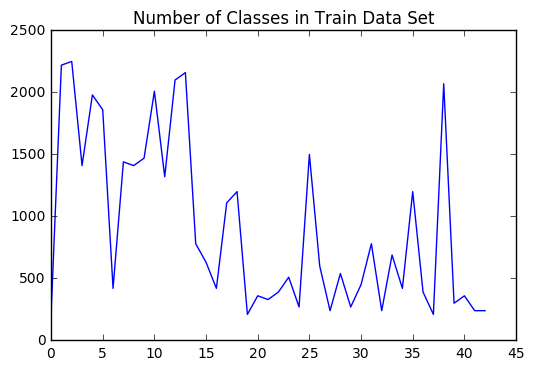

In [6]:
# Plot the graph showing the count in the Train Data set
plt.plot(count_train)
plt.title("Number of Classes in Train Data Set")
plt.show()

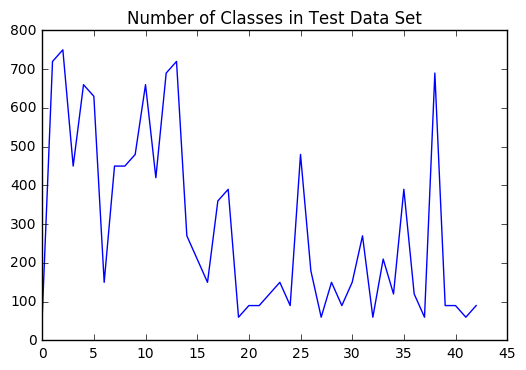

In [7]:
# Plot the graph showing the count in the Test Data set
plt.plot(count_test)
plt.title("Number of Classes in Test Data Set")
plt.show()

The count of each class is irregular. Some of them are very high, and the others are very low. I expect that this irregularity of the data might cause some trouble when I proceed the deep learning on this data.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Implement Min-Max scaling for image data
def normalize(image_data):
    a = 0.01
    b = 0.99
    color_min = 0.0
    color_max = 255.0
    
    return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))

# Normalize train features and test features
train_features = normalize(X_train)
test_features = normalize(X_test)

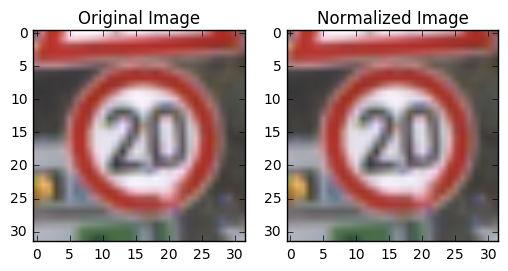

In [9]:
# Looking at the original image and normalized image
plt.subplot(121)
plt.imshow(X_train[15])
plt.title("Original Image")
plt.subplot(122)
plt.title("Normalized Image")
plt.imshow(train_features[15])
plt.show()

The features are all normalized to have well-conditioned data set.

In [10]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
# This is the script from https://github.com/udacity/CarND-TensorFlow-Lab/blob/master/lab.ipynb
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

First, I normalized the image data using min max scaling in order to have well-conditioned data set. When I looked at traffic signs, I noticed that there are no green colored signs, so I decided to take the green out of the color channels. Then, I one-hot encoded the labels sets. Now, labels will be represented as column vectors instead of digits.

In [11]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [12]:
### Generate data to have regular data set.

# Check the maximum number of counts of the classes.
max_count = np.max(count_train)
max_count

2250

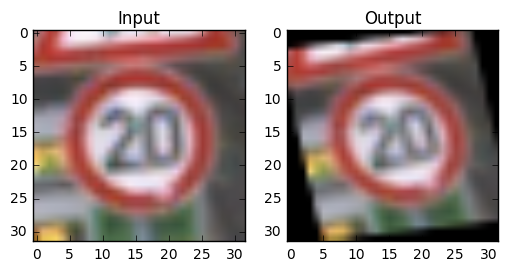

In [13]:
import random

def affine_transform(img):
    """
    Applies affine transfrom to the image to get a
    distorted image that is different from the original one.
    """
    points_before = np.float32([[10,10], [10,20], [20,10]])
    points_after = np.float32([[10+int(5*(random.random() - 0.5)), 10+int(5*(random.random() - 0.5))], 
                               [10+int(5*(random.random() - 0.5)), 20+int(5*(random.random() - 0.5))],
                               [20+int(5*(random.random() - 0.5)), 10+int(5*(random.random() - 0.5))]])
    M = cv2.getAffineTransform(points_before, points_after)
    rows, cols, ch = img.shape
    dst = cv2.warpAffine(img, M, (cols,rows))
    return dst

img = train_features[10]
dst = affine_transform(img)
plt.subplot(121)
plt.imshow(img)
plt.title('Input')
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

In [14]:
# Applying affine transformation to each class image

# Copy the train features to the new train set
train_features2 = np.copy(train_features)
y_train2 = np.copy(y_train)

# Print the shape of train_features2 and y_train2 before transformation
print("Before Transformation")
print("train_feature2 shape:", train_features2.shape)
print("y_train2 shape:", y_train2.shape)

Before Transformation
train_feature2 shape: (39209, 32, 32, 3)
y_train2 shape: (39209,)


In [15]:
# Iterate over the classes and append the distorted images 
# The transformation will be applied if the count is under 500.
# If the iteration is done, then all of the classes will have
# at least 500 images.

#Progress bar
images_pbar = tqdm(range(n_classes), desc='Progress', unit='class')

num = 500
for cls in images_pbar:
    if count_train[cls] < num:
        for count in range(num - count_train[cls]):
            rand = int(100*random.random())
            dst = affine_transform(train_features[np.argwhere(y_train==cls)[rand]][0])
            train_features2 = np.append(train_features2, [dst], axis=0)
            y_train2 = np.append(y_train2, [cls], axis=0)

Progress: 100%|██████████| 43/43 [42:32<00:00, 127.84s/class]


In [16]:
# Print the shape of train_features2 and y_train2 after transformation
print("\nAfter Transformation")
print("train_feature2 shape:", train_features2.shape)
print("y_train2 shape:", y_train2.shape)


After Transformation
train_feature2 shape: (42739, 32, 32, 3)
y_train2 shape: (42739,)


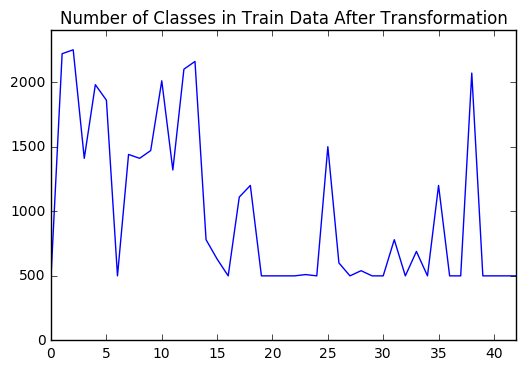

In [17]:
# Count the classes from the feature set after transformation
count_train2 = []
for i in range(n_classes):
    count = len(y_train2[y_train2==i])
    count_train2.append(count)

# Plot the graph showing the count in the Train Data set
plt.plot(count_train2)
plt.title("Number of Classes in Train Data After Transformation")
plt.axis([0, 42, 0, 2400])
plt.show()

In [18]:
# Apply One-Hot Encoding to the new labels
train_labels2 = encoder.transform(y_train2)

# Change to float32
train_labels2 = train_labels2.astype(np.float32)

print(train_labels2.shape)

(42739, 43)


In [19]:
# Get randomized datasets for training and validation
train_features2, valid_features, train_labels2, valid_labels = train_test_split(
    train_features2,
    train_labels2,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [20]:
import os

# Save the data for easy access
pickle_file = 'trafficSigns.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('trafficSigns.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features2,
                    'train_labels': train_labels2,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': test_features,
                    'test_labels': test_labels,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


---
# Checkpoint

All of the progress is saved. So when I return I can start from here.

In [21]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'trafficSigns.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data  # Free up memory

print('Data and modules loaded.')
print("train_features size:", train_features.shape)
print("train_labels size:", train_labels.shape)
print("valid_features size:", valid_features.shape)
print("valid_labels size:", valid_labels.shape)
print("test_features size:", test_features.shape)
print("test_labels size:", test_labels.shape)

Data and modules loaded.
train_features size: (40602, 32, 32, 3)
train_labels size: (40602, 43)
valid_features size: (2137, 32, 32, 3)
valid_labels size: (2137, 43)
test_features size: (12630, 32, 32, 3)
test_labels size: (12630, 43)


In [22]:
# number of training examples
n_train = train_features.shape[0]

# number of valid examples
n_valid = valid_features.shape[0]

# number of testing examples
n_test = test_features.shape[0]

# what's the shape of an image?
image_shape = train_features[0].shape

# how many classes are in the dataset
n_classes = train_labels.shape[1]

print("n_train:", n_train)
print("n_valid:", n_valid)
print("n_test:", n_test)
print("image shape:", image_shape)
print("n_classes:", n_classes)

n_train: 40602
n_valid: 2137
n_test: 12630
image shape: (32, 32, 3)
n_classes: 43


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I decided to generate addiotional data because I believe that the irregularity of the data will cause some issue when I proceed the deep learning to the data set. I used the affine transformations to the randomly chosen images of those classes that contain less than **800** images. For example, if a class *i* contains 700 images, then 100 images are created by affine transformations. As a result, the count of images of each class is at least 800.

After generating addtional data, the train data set was splitted into train and validation set using **train_test_split** from **sklearn** library. I used train_size = **5 %**. Then, I saved these data to pickle files so that I can use them immediately whenever I come back to this jupyter notebook file, rather than running all of the previous scripts from the beginning.

In [23]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
features_count = image_shape[0] * image_shape[1] * image_shape[2] # 32 x 32 x 3
labels_count = len(train_labels[0])

print("features count:", features_count)
print("labels count:", labels_count)

features count: 3072
labels count: 43


In [24]:
# Reformat the matrix
def reformat(matrix):
    return matrix.reshape((-1, features_count))

train_features = reformat(train_features)
valid_features = reformat(valid_features)
test_features = reformat(test_features)

# Print out shapes
print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)

(40602, 3072)
(2137, 3072)
(12630, 3072)


---
# Reducing Size

Reducing the size of the data.

In [25]:
train_features2 = np.zeros([1, features_count])
train_labels2 = np.zeros([1, labels_count])

print("train_features2 size", train_features2.shape)
print("train_labels2 size", train_labels.shape)


for cl in range(labels_count):
    tmp_features = np.reshape(train_features[np.argwhere(np.argmax(train_labels, axis=1)==cl)[:500]], (-1, features_count))
    tmp_labels = np.reshape(train_labels[np.argwhere(np.argmax(train_labels, axis=1)==cl)[:500]], (-1, labels_count))
    train_features2 = np.append(train_features2, tmp_features,axis=0)
    train_labels2 = np.append(train_labels2, tmp_labels, axis=0)
    
train_features = train_features2[1:]
train_labels = train_labels2[1:]
print("train_features size", train_features.shape)
print("train_labels size", train_labels.shape)

train_features2 size (1, 3072)
train_labels2 size (40602, 43)
train_features size (21018, 3072)
train_labels size (21018, 43)


---
# Multilayer Convolutional Network

In [26]:
# parameters
depth_conv1 = 64
depth_conv2 = 128
num_hidden = 256

# Set the features and labels tensors
x = tf.placeholder(tf.float32, shape=[None, features_count])
y_ = tf.placeholder(tf.float32, shape=[None, labels_count])

# Weight Initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Convolutional and Pooling
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### First Convolutional Layer
W_conv1 = weight_variable([5, 5, image_shape[2], depth_conv1])
b_conv1 = bias_variable([depth_conv1])

x_image = tf.reshape(x, [-1,image_shape[0],image_shape[1],image_shape[2]])

# Applying Relu function
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### Densely Connected Layer
reduced_size = image_shape[0]//4 * image_shape[1]//4* depth_conv1
W_fc1 = weight_variable([reduced_size, num_hidden])
b_fc1 = bias_variable([num_hidden])

shape = h_pool1.get_shape().as_list()
h_pool1_flat = tf.reshape(h_pool1, [-1, shape[1] * shape[2] * shape[3]])
h_fc1 = tf.nn.relu(tf.matmul(h_pool1_flat, W_fc1) + b_fc1)

### Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer
W_fc2 = weight_variable([num_hidden, labels_count])
b_fc2 = bias_variable([labels_count])

# Prediction
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Loss and Cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))

# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

# Feed dicts for training, validation, and test session
train_feed_dict = {x: train_features, y_: train_labels, keep_prob: 1.0}
valid_feed_dict = {x: valid_features, y_: valid_labels, keep_prob: 1.0}
test_feed_dict = {x: test_features, y_: test_labels, keep_prob: 1.0}

print("variables set.")

variables set.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Below is the summary of my architecture.

- Convolutional layer: filter size = [5, 5, 32, 32], stride = 2
- ReLU function
- Maxpool: stride = 2
- ReLU function
- Dropout: probability = 0.5
- The final layer for the output

I used *Dropout* because the size of the data is huge so the course recommended to use *Dropout* to avoid **overfitting**. 

At first, I tried to use two convolutional layers, but it takes too much time and the result was not very satisfactory. When I reduced the number of convolutional layer to just one and reran it, the overall speed increased drastically and the accuracy was very good which was about **93.4%**.

In [27]:
### Train your model here.
### Feel free to use as many code cells as needed.

Epoch  2/2: 100%|██████████| 421/421 [01:22<00:00,  5.10batches/s]


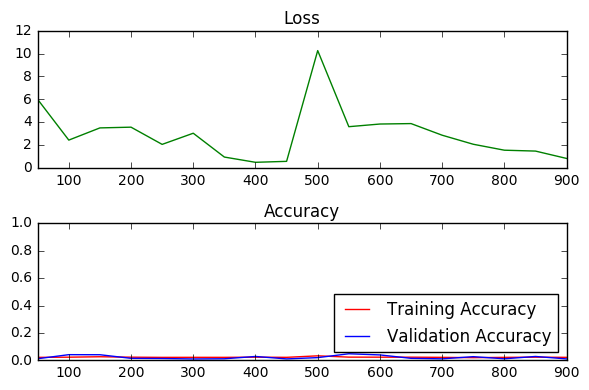

Validation accuracy at 0.01123069692403078


In [30]:
# Find the best parameters for each configuration
epochs = 2
batch_size = 50
learning_rate = 0.05

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            
            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})
            
            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

# Measuing Accuracy Against The Test Set

In [29]:
# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})

        # Check accuracy against Test data
        test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)


assert test_accuracy >= 0.80, 'Test accuracy at {}, should be equal to or greater than 0.80'.format(test_accuracy)
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

Epoch  9/9: 100%|██████████| 421/421 [00:11<00:00, 36.21batches/s]


AssertionError: Test accuracy at 0.00712589081376791, should be equal to or greater than 0.80

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used *Gradient Descent* as my optimizer, and I set *epoch = 10*, *batch size = 50*, and *learning rate = 0.05*. I found that learning rate 0.01 to be inefficient and slow for this data set and using a greater rate showed better results. I didn't increase the number of *epoch* since the accuracy graph did not increase after 6000 batches.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

It took me several days to come up with this architecture. Initially, I used a basic layer with a lot of epochs and small learning rates. I experimented with it and realized that the maximum accuracy I can get is about **77%**. I believe that the minimum loss from the basic architecture is about that level. I decided to complicate the architecture using numerous techniques such as convolutional layers, ReLU, Dropout, and so on. It takes some time to figure out how to write down scripts for those layers and I confronted a lot of errors while doing it. Throughout trials and erros over several days, I found the most efficient - the most accurate and fastest - deep learning architecture.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
import os
import cv2

# List the images from the saved directory
img_files = os.listdir('./new_signs/')

test_images = np.zeros((1,32,32,2))

# Show each image
for i in img_files:
    image = './new_signs/' + i
    img = plt.imread(image)
    img = cv2.resize(img, (32,32))
    plt.imshow(img)
    plt.show()
    
    # Append to the test_images array
    test_images = np.append(test_images, [img[:,:,[0,2]]], axis=0)
    
# Remove the zero matrix at index 0
test_images = test_images[1:]

In [ ]:
# Print out the test images shape
print("test images shape:", test_images.shape)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Saving labels
test_images_labels = np.array([[39],[28],[9],[17],[23],[14],[13]])

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(test_labels)
test_images_labels = encoder.transform(test_images_labels)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
test_images_labels = test_images_labels.astype(np.float32)

print('Labels One-Hot Encoded')

In [ ]:
# Reshaping test images
test_images = np.reshape(test_images, [-1,32*32*2])

print(test_images.shape)
print("reshape successful")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I found the photos of traffic signs taken by other people from internet. Since the data that I used was 32 by 32 in numpy array, I reshaped all of the photos to 32 by 32. As a result, the photos became blurry and difficult to identify.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [ ]:
test_feed_dict = {x: test_images, y_: test_images_labels, keep_prob: 1.0}

# Find the best parameters for each configuration
epochs = 2
batch_size = 50
learning_rate = 0.05

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# The accuracy measured against the test set
test_accuracy = 0.0

with tf.Session() as session:
    
    session.run(init)
    batch_count = int(math.ceil(len(train_features)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer
            _ = session.run(optimizer, feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})
            

        # Check accuracy against Test data
        test_accuracy, yy_ = session.run([accuracy, y_conv], feed_dict=test_feed_dict)
        print(np.argmax(yy_, axis=1))
        print(yy_.shape)
        
print('Nice Job! Test Accuracy is {}'.format(test_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Unfortunately, the model didn't perform very well with the captured pictures. One noticeable thing was that when the model tried to identify the first test image, it sometimes focused on yellow, which led to the wrong label, and sometimes focused on blue, which led to the correct label. Since the model started from the random numbers, it can lead to two different outcomes depending on the circumstances.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [ ]:
test_result = np.argmax(yy_, axis=1)

for i in range(len(test_result)):
    plt.subplot(121)
    plt.title("Result {}".format(test_result[i]))
    plt.imshow(np.reshape(train_features[np.argwhere(np.argmax(train_labels, axis=1)==test_result[i])[0]],[32,32,2])[:,:,1])
    plt.subplot(122)
    plt.title("Actual {}".format(np.argmax(test_images_labels[i])))
    print(test_images[0].shape)
    plt.imshow(np.reshape(test_images[i],[32,32,2])[:,:,1])
    plt.show()
    plt.plot(yy_[i])
    top5 = np.argsort(yy_[i])[::-1][:5]
    for k in top5:
        plt.plot(k, yy_[i][k], 'ro')
        plt.annotate(k, xy=(k,yy_[i][k]))
    plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

However, when looking at the graphs from the probabilities, the actual sign labels are listed in top 5. However, the model recognized **14 (Stop sign)** accurately since the stop sign picture showed the best quality among the test pictures. 

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.